- bookID: Unique identification number fro each book
- title: Name under which book was published
- authors: Name of the Authors of the book
- average_rating: Avarage rating of the book recevied in total.
- isbn: International standarded book number
- isbn13: 13 digit isbn to identify the book
- language_code: Primary Language of the book
- num_pages: Number of pages the book containes
- ratings_count: Total Number of ratings the book recevied.
- text_reviews_count: Total number of written reviews recevied.
- publication_date: Date when the book was first published
- publisher: Name of the Pulishers

In [2]:
import pandas as pd
import numpy as np

# for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# for interactive plots
import ipywidgets
from ipywidgets import interact
from ipywidgets import interact_manual

In [3]:
df = pd.read_csv("books.csv", on_bad_lines='skip')

In [4]:
df.head(5)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [5]:
df.shape

(11123, 12)

In [6]:
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [7]:
df.columns = df.columns.str.strip()

In [8]:
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [9]:
df.dtypes

bookID                  int64
title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                  int64
language_code          object
num_pages               int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
dtype: object

In [10]:
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [11]:
df.describe(include='object')

,title,authors,isbn,language_code,publication_date,publisher
count,11123,11123,11123,11123,11123,11123
unique,10348,6639,11123,27,3679,2290
top,The Iliad,Stephen King,0439785960,eng,10/1/2005,Vintage
freq,9,40,1,8908,56,318


In [12]:
df.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [13]:
df.duplicated().any()

False

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7   num_pages           11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


# Feature Engineering

- Extract Important Features
- Reducing the size of Features
- Creating new features from the existring ones

In [15]:
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [16]:
df.isbn.nunique()

11123

In [17]:
df.isbn13.nunique()

11123

In [18]:
df.drop(['bookID', 'isbn', 'isbn13'], axis=1, inplace=True)

In [19]:
df.columns

Index(['title', 'authors', 'average_rating', 'language_code', 'num_pages',
       'ratings_count', 'text_reviews_count', 'publication_date', 'publisher'],
      dtype='object')

In [20]:
df.publication_date

0         9/16/2006
1          9/1/2004
2         11/1/2003
3          5/1/2004
4         9/13/2004
            ...    
11118    12/21/2004
11119     12/1/1988
11120      8/1/1993
11121     2/27/2007
11122     5/28/2006
Name: publication_date, Length: 11123, dtype: object

In [21]:
df['year'] = df['publication_date'].str.split('/')
df['year'] = df['year'].apply(lambda x: x[2])

In [22]:
df.head(2)

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,year
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,2006
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,2004


In [23]:
df.dtypes

title                  object
authors                object
average_rating        float64
language_code          object
num_pages               int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
year                   object
dtype: object

In [24]:
df['year'] = df['year'].astype('int')

In [25]:
df.dtypes

title                  object
authors                object
average_rating        float64
language_code          object
num_pages               int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
year                    int32
dtype: object

In [26]:
df.columns

Index(['title', 'authors', 'average_rating', 'language_code', 'num_pages',
       'ratings_count', 'text_reviews_count', 'publication_date', 'publisher',
       'year'],
      dtype='object')

In [27]:
df['year'].min()

1900

In [28]:
df['year'].max()

2020

In [29]:
df.columns

Index(['title', 'authors', 'average_rating', 'language_code', 'num_pages',
       'ratings_count', 'text_reviews_count', 'publication_date', 'publisher',
       'year'],
      dtype='object')

# Exploratory Data Analysis

In [30]:
df[df['year'] == 2020][['title', 'authors',
                        'average_rating', 'language_code', 'publisher']]

,title,authors,average_rating,language_code,publisher
9664,A Quick Bite (Argeneau #1),Lynsay Sands,3.91,eng,Avon


In [31]:
df.groupby(['year'])['title'].agg(
    'count').sort_values(ascending=False).head(20)

year
2006    1700
2005    1260
2004    1069
2003     931
2002     798
2001     656
2000     534
2007     518
1999     450
1998     396
1997     290
1996     250
1995     249
1994     220
1992     183
1993     165
1991     151
1989     118
1990     117
1987      88
Name: title, dtype: int64

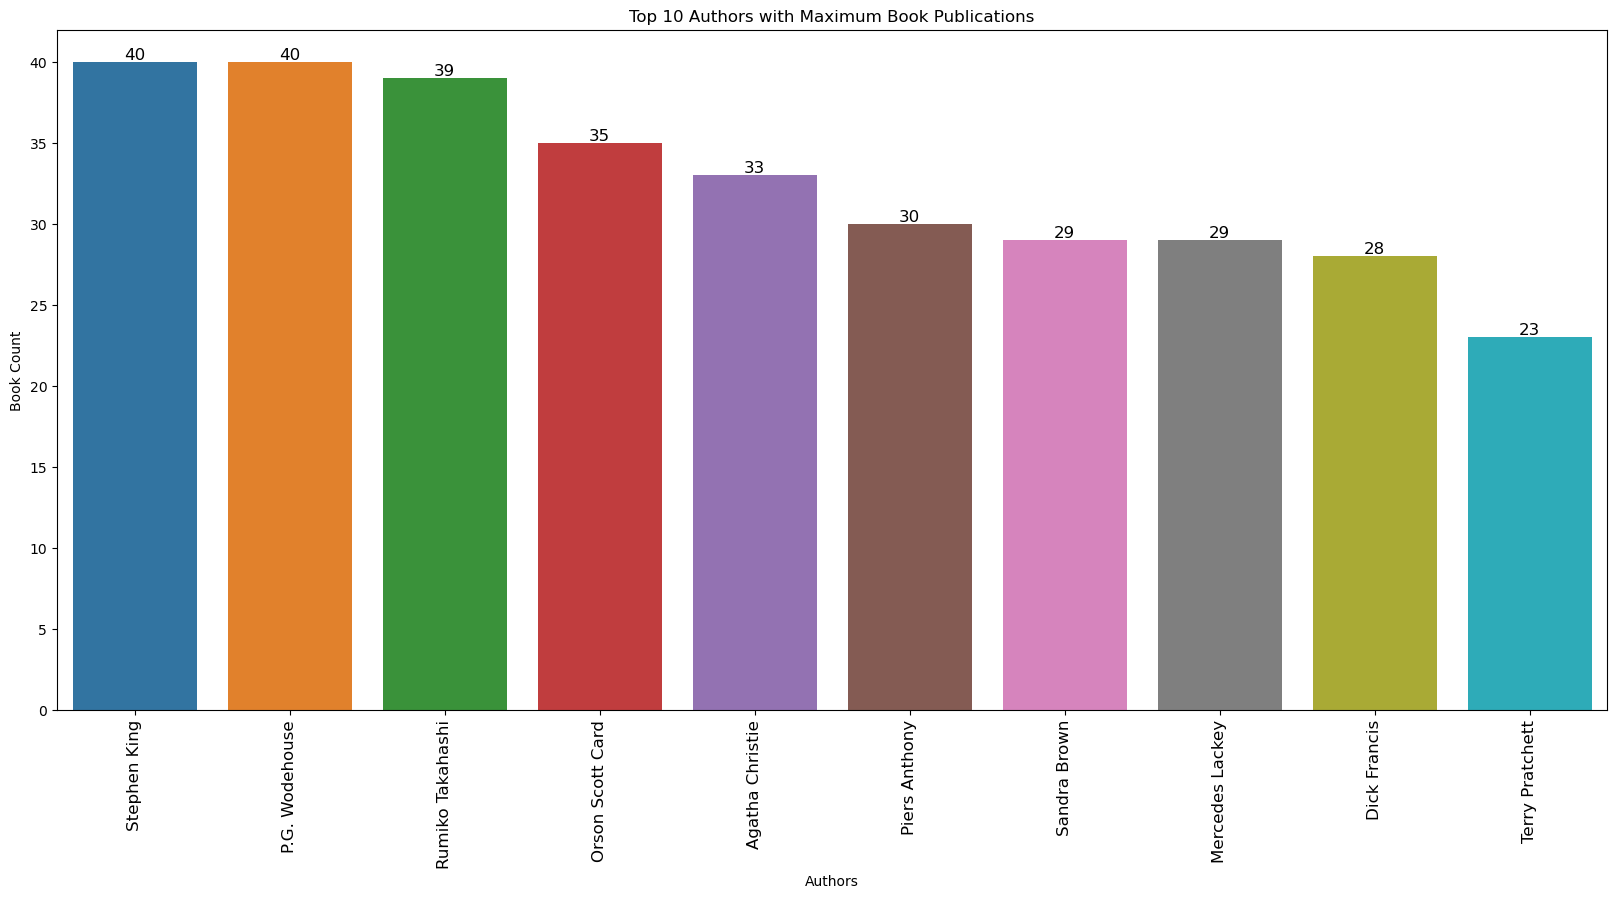

In [32]:
plt.figure(figsize=(20, 10))
sorted_authors = df['authors'].value_counts().iloc[:10].index
sns.countplot(x='authors', data=df, order=sorted_authors)

for i, count in enumerate(df['authors'].value_counts().iloc[:10]):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=12)

plt.xticks(rotation=90, fontsize=12)
plt.title("Top 10 Authors with Maximum Book Publications")
plt.xlabel("Authors")
plt.ylabel("Book Count")
plt.subplots_adjust(bottom=0.2)
plt.show()

In [33]:
df.columns

Index(['title', 'authors', 'average_rating', 'language_code', 'num_pages',
       'ratings_count', 'text_reviews_count', 'publication_date', 'publisher',
       'year'],
      dtype='object')

In [34]:
df.language_code.value_counts()

language_code
eng      8908
en-US    1408
spa       218
en-GB     214
fre       144
ger        99
jpn        46
mul        19
zho        14
grc        11
por        10
en-CA       7
ita         5
enm         3
lat         3
swe         2
rus         2
srp         1
nl          1
msa         1
glg         1
wel         1
ara         1
nor         1
tur         1
gla         1
ale         1
Name: count, dtype: int64

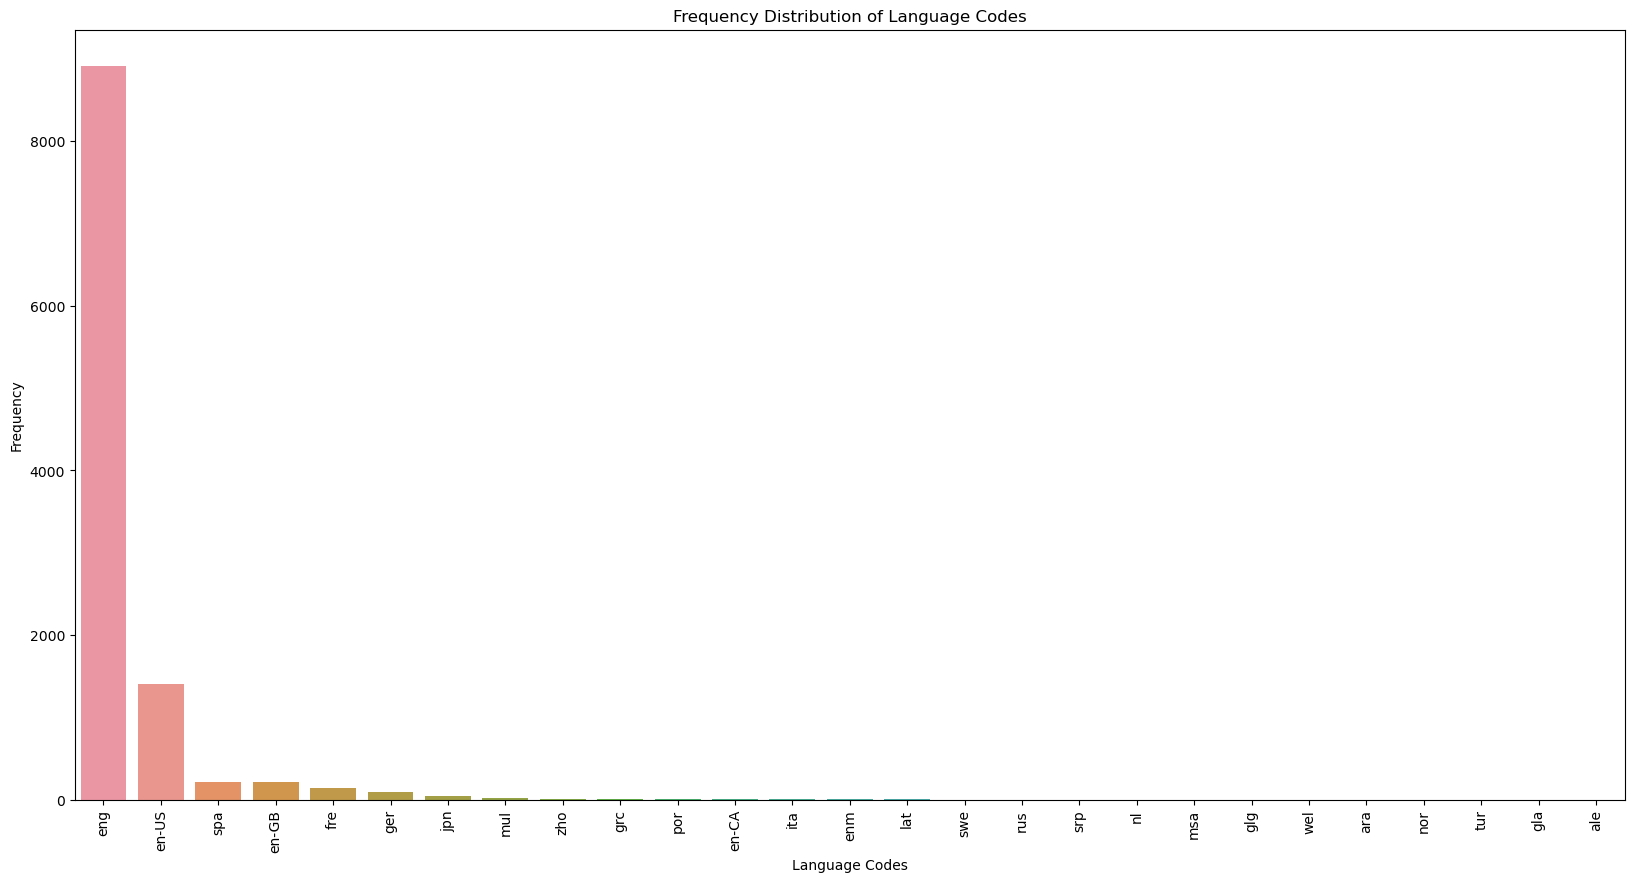

Top 10 Language Codes with their Frequencies:
language_code
eng      8908
en-US    1408
spa       218
en-GB     214
fre       144
ger        99
jpn        46
mul        19
zho        14
grc        11
Name: count, dtype: int64

Top 10 Language Codes with their Percentages:
language_code
eng      80.09
en-US    12.66
spa       1.96
en-GB     1.92
fre       1.29
ger       0.89
jpn       0.41
mul       0.17
zho       0.13
grc       0.10
Name: count, dtype: float64


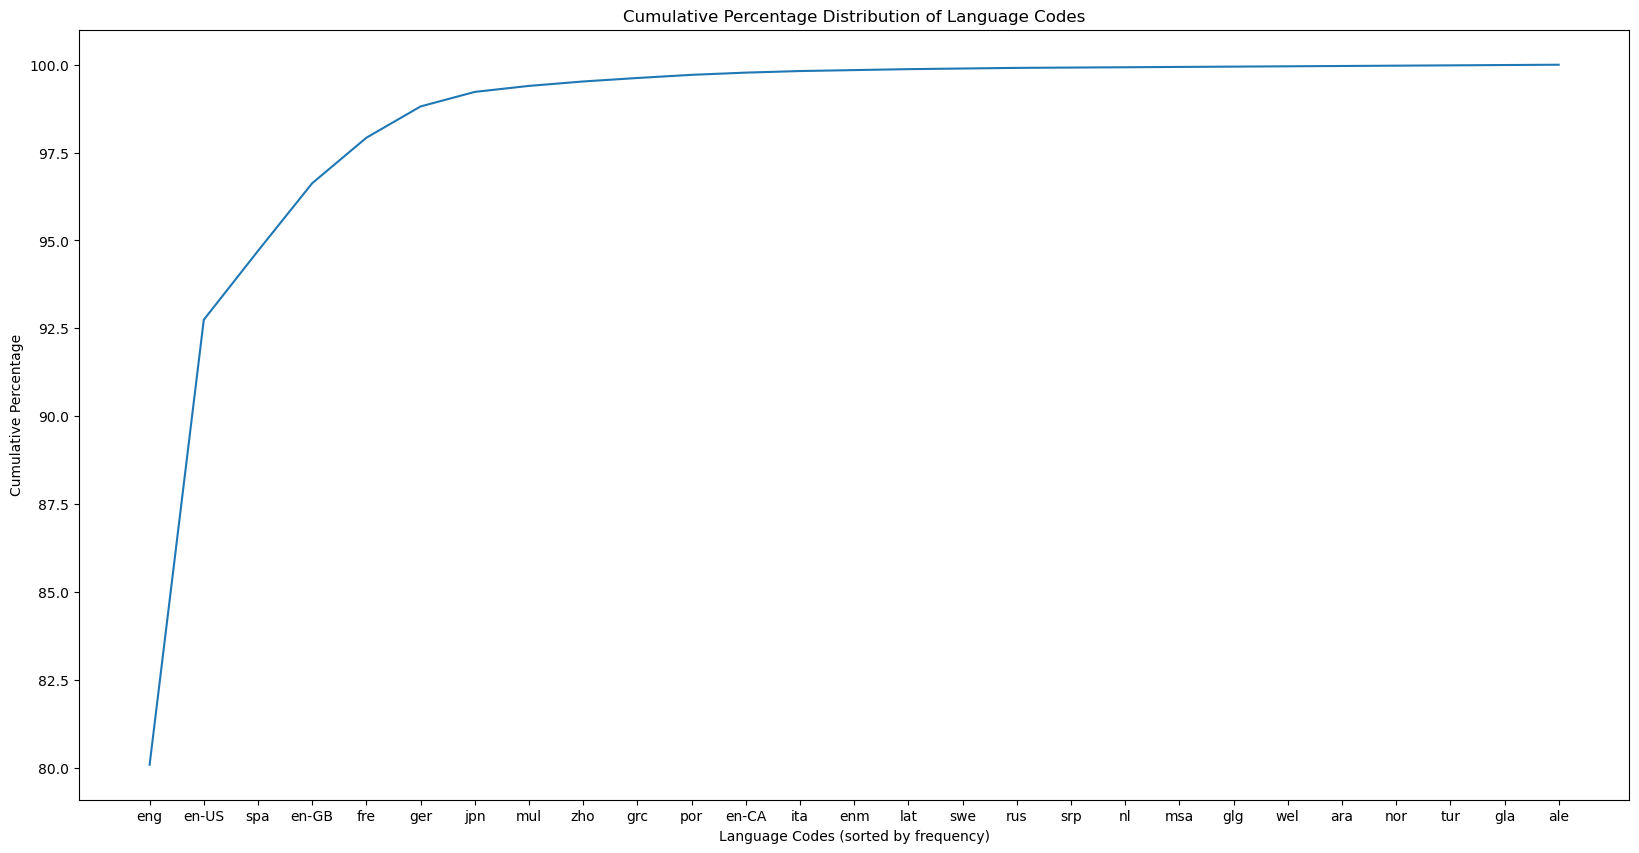

In [35]:
# Count the frequency of each language code
language_counts = df.language_code.value_counts()

# Plot the frequency distribution
plt.figure(figsize=(20, 10))
sns.barplot(x=language_counts.index, y=language_counts.values)
plt.title("Frequency Distribution of Language Codes")
plt.xlabel("Language Codes")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()
# top 10 language codes
print("Top 10 Language Codes with their Frequencies:")
print(language_counts.head(10))

# Calculate the percentage of each language code
total_count = language_counts.sum()
language_percentages = (language_counts / total_count) * 100

# Display the top 10 language codes with their percentages
print("\nTop 10 Language Codes with their Percentages:")
print(language_percentages.head(10).round(2))

# Calculate the cumulative percentage of language codes
language_percentages_cumulative = language_percentages.cumsum()

# Plot the cumulative percentage distribution
plt.figure(figsize=(20, 10))
plt.plot(language_percentages_cumulative)
plt.title("Cumulative Percentage Distribution of Language Codes")
plt.xlabel("Language Codes (sorted by frequency)")
plt.ylabel("Cumulative Percentage")
plt.show()

In [36]:
df.groupby(['language_code'])[['average_rating',
                               'ratings_count',
                               'text_reviews_count']].agg('mean').style.background_gradient(cmap='Wistia')

,average_rating,ratings_count,text_reviews_count
language_code,,,
ale,4.360000,102.000000,16.000000
ara,3.550000,122.000000,12.000000
en-CA,4.025714,4086.714286,324.428571
en-GB,3.923411,2463.691589,104.060748
en-US,3.914659,3773.906960,160.357244
eng,3.934062,21570.272564,645.156601
enm,3.873333,3233.666667,84.000000
fre,3.971528,3277.319444,64.513889
ger,3.950101,234.727273,8.232323


In [37]:
book = df['title'].value_counts()[:20]
book

title
The Iliad                     9
The Brothers Karamazov        9
The Odyssey                   8
Anna Karenina                 8
'Salem's Lot                  8
Gulliver's Travels            8
The Picture of Dorian Gray    7
A Midsummer Night's Dream     7
The Histories                 6
Macbeth                       6
Sense and Sensibility         6
Robinson Crusoe               6
Treasure Island               6
Jane Eyre                     6
Romeo and Juliet              6
Collected Stories             6
The Secret Garden             6
The Scarlet Letter            6
The Great Gatsby              6
Frankenstein                  5
Name: count, dtype: int64

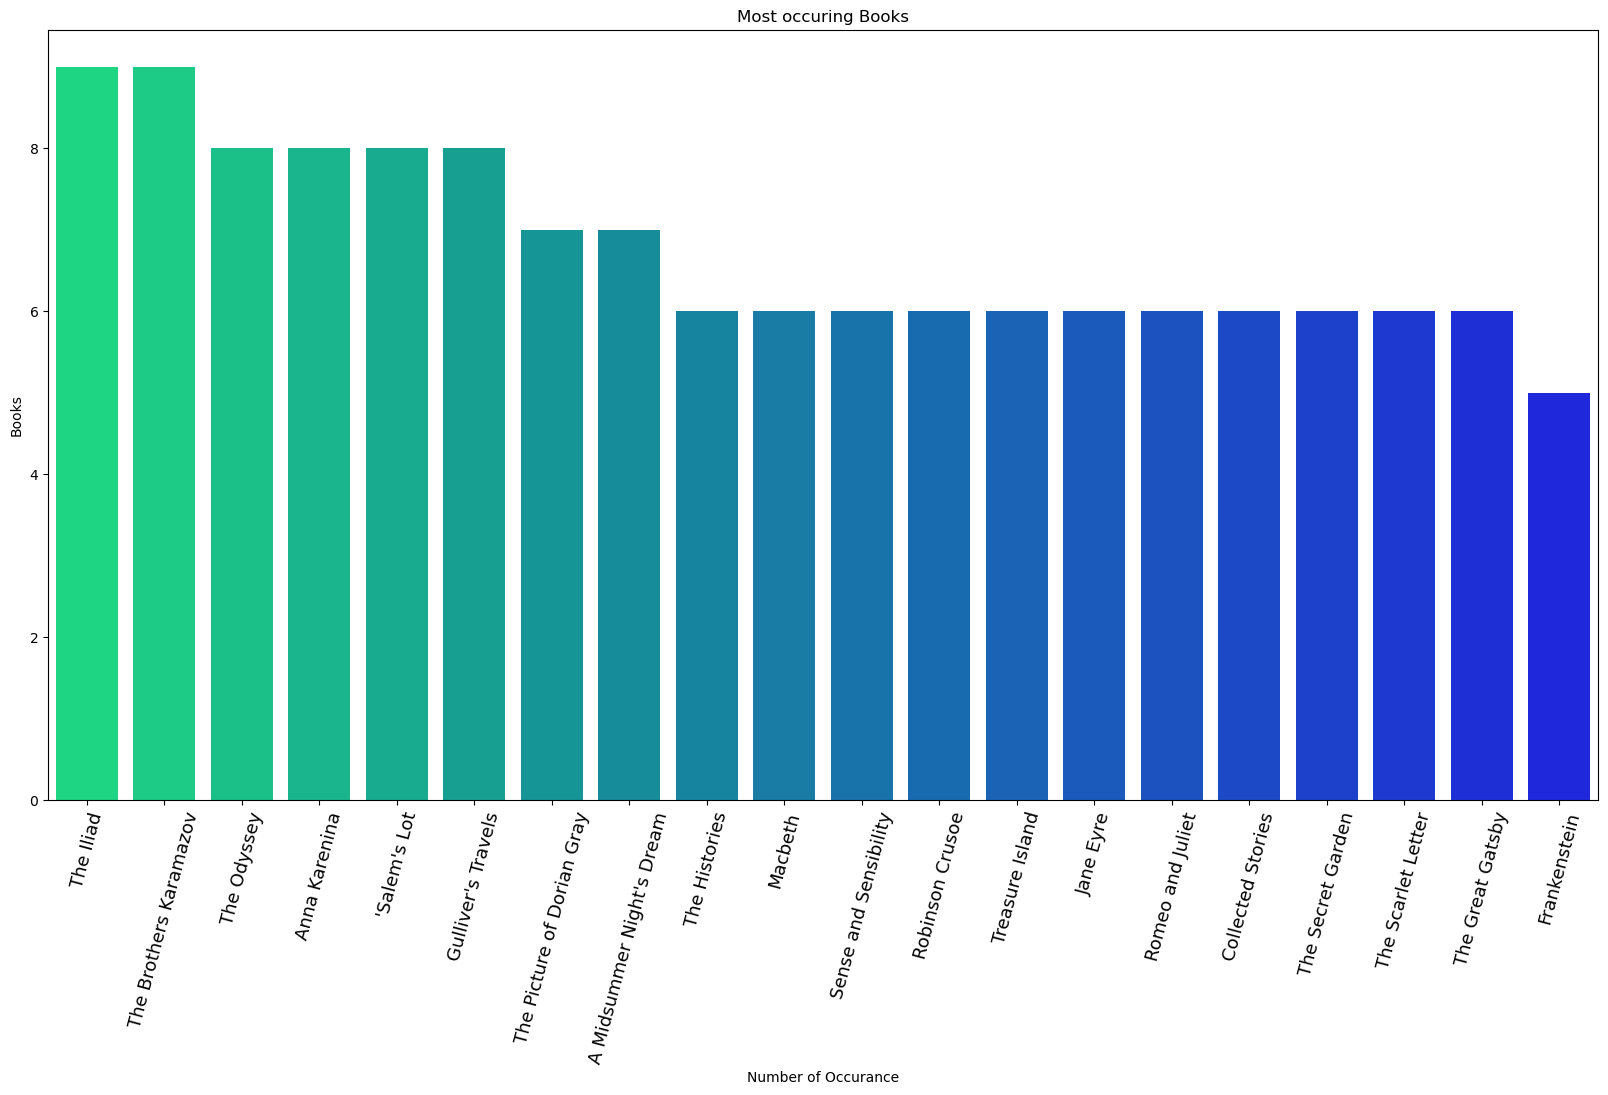

In [38]:
# to find most occuring book in our data
plt.figure(figsize=(20, 10))
book = df['title'].value_counts()[:20]
sns.barplot(x=book.index, y=book,
            palette='winter_r')
plt.title("Most occuring Books")
plt.xlabel("Number of Occurance")
plt.ylabel("Books")
plt.xticks(rotation=75, fontsize=13)
plt.show()

c:\Users\Rabin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Average Rating: 3.93
Standard Deviation: 0.35


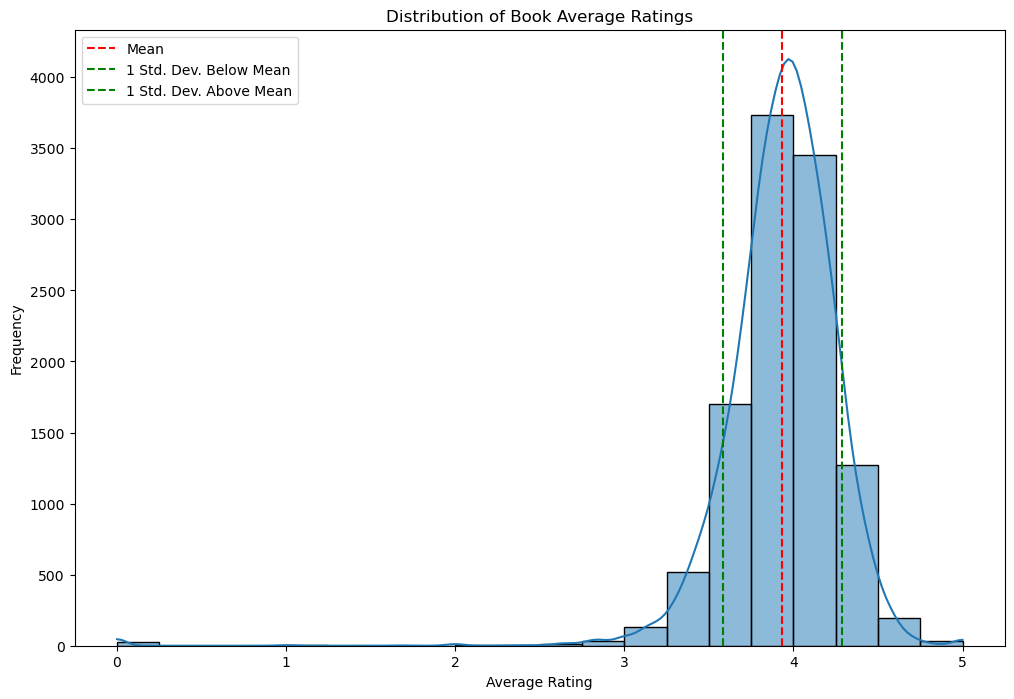

In [39]:
# Plot the distribution of average ratings
plt.figure(figsize=(12, 8))
sns.histplot(df['average_rating'], kde=True, bins=20)

# Add labels and title
plt.title('Distribution of Book Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')

# Calculate and display summary statistics
avg_rating = df['average_rating'].mean()
std_rating = df['average_rating'].std()
print(f'Average Rating: {avg_rating:.2f}')
print(f'Standard Deviation: {std_rating:.2f}')

# Add vertical lines for mean and standard deviations
plt.axvline(avg_rating, color='r', linestyle='--', label='Mean')
plt.axvline(avg_rating - std_rating, color='g', linestyle='--', label='1 Std. Dev. Below Mean')
plt.axvline(avg_rating + std_rating, color='g', linestyle='--', label='1 Std. Dev. Above Mean')
plt.legend()

plt.show()

Book with the Maximum Average Rating:
                                                   title  \
624    Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...   
786                    Willem de Kooning: Late Paintings   
855    Literature Circle Guide: Bridge to Terabithia:...   
1243   Middlesex Borough (Images of America: New Jersey)   
4125   Zone of the Enders: The 2nd Runner Official St...   
4788   The Diamond Color Meditation: Color Pathway to...   
4933   Bulgakov's the Master and Margarita: The Text ...   
5023   The Complete Theory Fun Factory: Music Theory ...   
5474   The Goon Show  Volume 4: My Knees Have Fallen ...   
5476   The Goon Show  Volume 11: He's Fallen in the W...   
5647                                 Winchester Shotguns   
5648   Colossians and Philemon: A Critical and Exeget...   
6184                           Taxation of Mineral Rents   
6247                         The New Big Book of America   
6775   Delwau Duon: Peintiadau Nicholas Evans = Symph...   
85

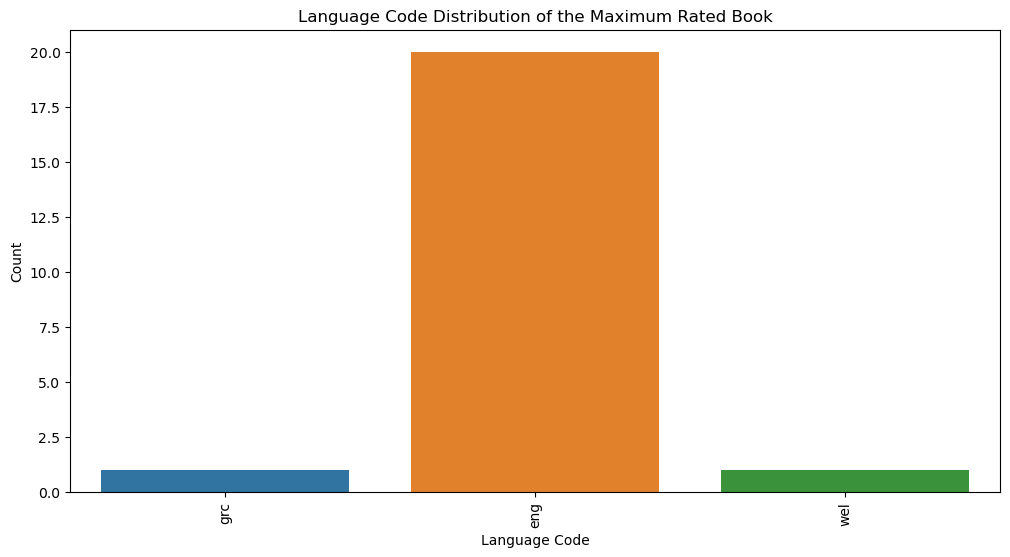

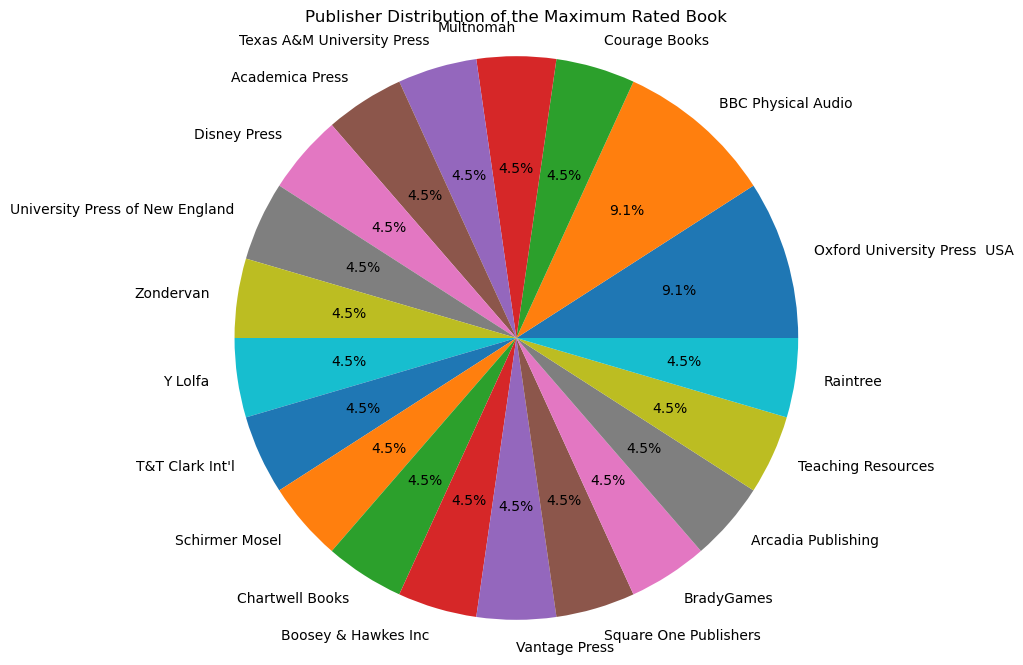

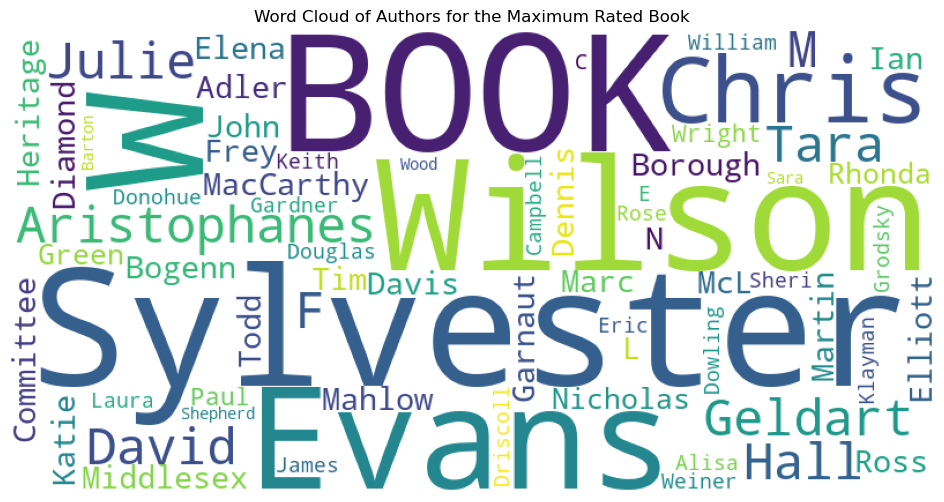

In [40]:
# Find the book with the maximum average rating
max_rated_book = df[df.average_rating == df.average_rating.max()][['title', 'authors', 'language_code', 'publisher']]

# Display the details of the book with the maximum average rating
print("Book with the Maximum Average Rating:")
print(max_rated_book)

# Create a bar plot to show the distribution of language codes
plt.figure(figsize=(12, 6))
sns.countplot(x='language_code', data=max_rated_book)
plt.title("Language Code Distribution of the Maximum Rated Book")
plt.xlabel("Language Code")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

# Create a pie chart to show the publisher distribution
plt.figure(figsize=(8, 8))
publisher_counts = max_rated_book['publisher'].value_counts()
plt.pie(publisher_counts, labels=publisher_counts.index, autopct='%1.1f%%')
plt.title("Publisher Distribution of the Maximum Rated Book")
plt.axis('equal')
plt.show()

# Create a word cloud for the authors
from wordcloud import WordCloud
author_text = ' '.join(max_rated_book['authors'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(author_text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud)
plt.title("Word Cloud of Authors for the Maximum Rated Book")
plt.axis('off')
plt.show()

In [41]:
publisher = df['publisher'].value_counts()[:20]
publisher

publisher
Vintage                         318
Penguin Books                   261
Penguin Classics                184
Mariner Books                   150
Ballantine Books                144
Harper Perennial                112
HarperCollins                   112
Pocket Books                    111
Bantam                          110
VIZ Media LLC                    88
Berkley                          86
Dover Publications               85
Modern Library                   82
Del Rey                          80
Tor Books                        76
Grand Central Publishing         76
Oxford University Press  USA     75
Oxford University Press          73
Scribner                         73
W. W. Norton  Company            68
Name: count, dtype: int64

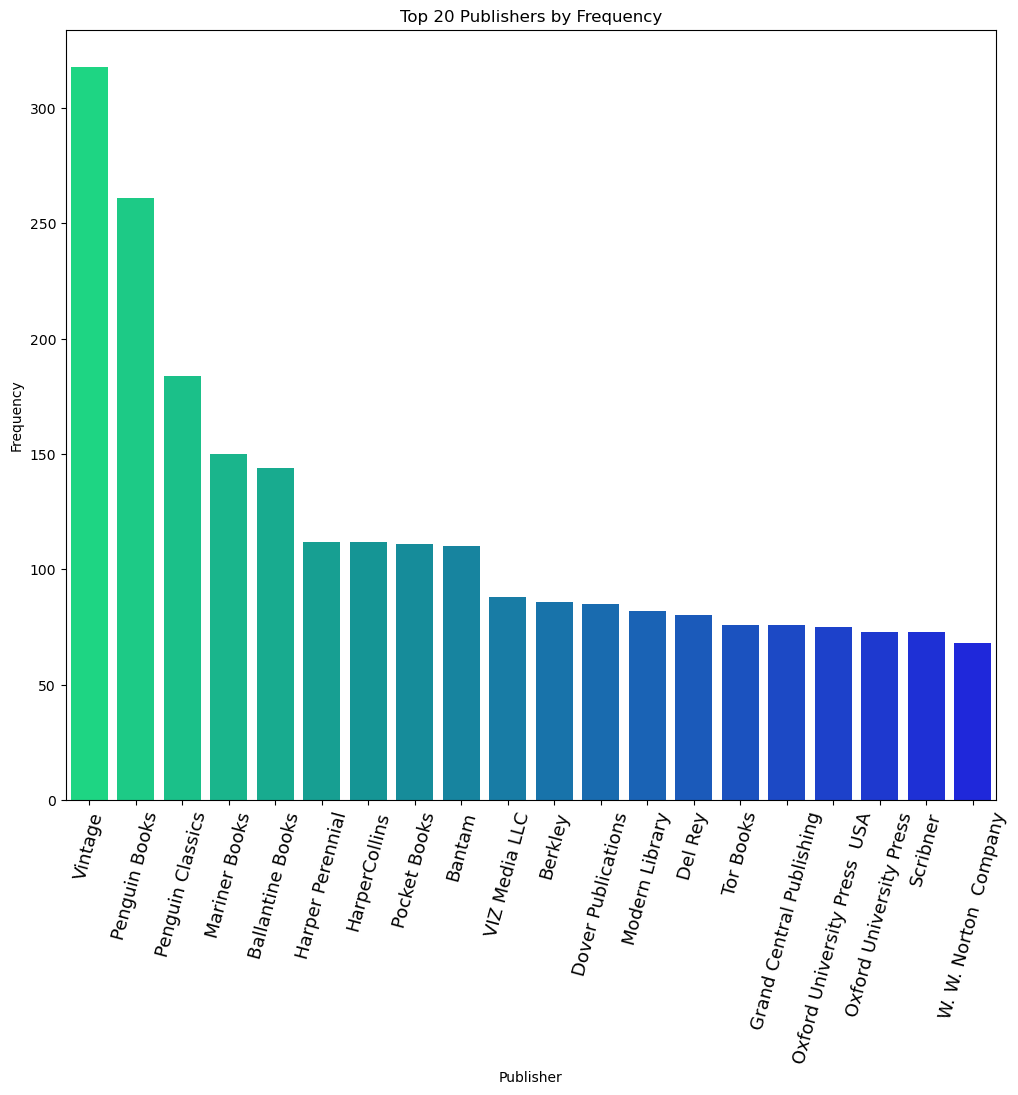

In [42]:
# Get the top 20 publishers by frequency
top_publishers = df['publisher'].value_counts()[:20]

# Create a bar plot to show the top 20 publishers
plt.figure(figsize=(12, 10))
sns.barplot(x=top_publishers.index, y=top_publishers.values, palette='winter_r')
plt.title("Top 20 Publishers by Frequency")
plt.xlabel("Publisher")
plt.ylabel("Frequency")
plt.xticks(rotation=75, fontsize=13)
plt.show()

### Recommending Books based on Publishers
### Recommending Books based on Authors
### Recommending Books based on Language

In [43]:
df.publisher.value_counts()

publisher
Vintage                        318
Penguin Books                  261
Penguin Classics               184
Mariner Books                  150
Ballantine Books               144
                              ... 
University of Calgary Press      1
Marlowe & Company                1
University Press of America      1
Abstract Studio                  1
VeloPress                        1
Name: count, Length: 2290, dtype: int64

In [44]:
df.columns

Index(['title', 'authors', 'average_rating', 'language_code', 'num_pages',
       'ratings_count', 'text_reviews_count', 'publication_date', 'publisher',
       'year'],
      dtype='object')

In [45]:
def recomd_books_publisheres(x):
    a = df[df['publisher'] == x][['title', 'average_rating']]
    a = a.sort_values(by='average_rating', ascending=False)
    return a.head(10)

In [46]:
recomd_books_publisheres('Vintage')

,title,average_rating
7371,Remembrance of Things Past: Volume II - The Gu...,4.53
335,The Power Broker: Robert Moses and the Fall of...,4.51
10838,The Civil War Vol. 1: Fort Sumter to Perryville,4.42
1775,The Son Avenger (The Master of Hestviken #4),4.40
1505,A Fine Balance,4.36
9626,Nobody Knows My Name,4.35
2267,The Stories of Vladimir Nabokov,4.30
3112,All of Us: The Collected Poems,4.30
8787,Selected Stories,4.28
4019,Selected Stories,4.28


In [47]:
recomd_books_publisheres('Penguin Books')

,title,average_rating
4244,The Complete Maus,4.55
5564,The Penguin Companion to European Literature,4.50
1381,Before The Mayflower A History of Black America,4.44
4602,Selected Non-Fictions,4.43
3011,The Read-Aloud Handbook,4.41
4551,Life With Jeeves (Jeeves #6 2 & 4),4.39
1275,East of Eden,4.37
3304,Ludwig Wittgenstein: The Duty of Genius,4.36
4980,Life at Blandings,4.35
10867,The Portable Dorothy Parker,4.34


In [48]:
df.columns

Index(['title', 'authors', 'average_rating', 'language_code', 'num_pages',
       'ratings_count', 'text_reviews_count', 'publication_date', 'publisher',
       'year'],
      dtype='object')

# based upon Authors

In [ ]:
df.columns

Index(['title', 'authors', 'average_rating', 'language_code', 'num_pages',
       'ratings_count', 'text_reviews_count', 'publication_date', 'publisher',
       'year'],
      dtype='object')

In [ ]:
@interact
def recomd_books_lang(language=list(df['language_code'].value_counts().index)):
    a = df[df['language_code'] == language][['title', 'average_rating']]
    a = a.sort_values(by='average_rating', ascending=False)
    return a.head(10)

interactive(children=(Dropdown(description='language', options=('eng', 'en-US', 'spa', 'en-GB', 'fre', 'ger', …

# Data Preprocessing

In [ ]:
df.head(2)

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,year
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,2006
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,2004


In [ ]:
def num_to_obj(x):
    if x > 0 and x <= 1:
        return "between 0 and 1"
    if x > 1 and x <= 2:
        return "between 1 and 2"
    if x > 2 and x <= 3:
        return "between 2 and 3"
    if x > 3 and x <= 4:
        return "between 3 and 4"
    if x > 4 and x <= 5:
        return "between 4 and 5"


df['rating_obj'] = df['average_rating'].apply(num_to_obj)

In [ ]:
df['rating_obj'].value_counts()

between 3 and 4    6285
between 4 and 5    4735
between 2 and 3      69
between 1 and 2       7
between 0 and 1       2
Name: rating_obj, dtype: int64

In [ ]:
rating_df = pd.get_dummies(df['rating_obj'])
rating_df.head()

,between 0 and 1,between 1 and 2,between 2 and 3,between 3 and 4,between 4 and 5
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1


In [ ]:
df.columns

Index(['title', 'authors', 'average_rating', 'language_code', 'num_pages',
       'ratings_count', 'text_reviews_count', 'publication_date', 'publisher',
       'year', 'rating_obj'],
      dtype='object')

In [ ]:
language_df = pd.get_dummies(df['language_code'])
language_df.head()

,ale,ara,en-CA,en-GB,en-US,eng,enm,fre,ger,gla,...,nl,nor,por,rus,spa,srp,swe,tur,wel,zho
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
features = pd.concat([rating_df, language_df, df['average_rating'],
                      df['ratings_count'], df['title']], axis=1)
features.set_index('title', inplace=True)
features.head()

,between 0 and 1,between 1 and 2,between 2 and 3,between 3 and 4,between 4 and 5,ale,ara,en-CA,en-GB,en-US,...,por,rus,spa,srp,swe,tur,wel,zho,average_rating,ratings_count
title,,,,,,,,,,,,,,,,,,,,,
Harry Potter and the Half-Blood Prince (Harry Potter #6),0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.57,2095690
Harry Potter and the Order of the Phoenix (Harry Potter #5),0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.49,2153167
Harry Potter and the Chamber of Secrets (Harry Potter #2),0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.42,6333
Harry Potter and the Prisoner of Azkaban (Harry Potter #3),0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.56,2339585
Harry Potter Boxed Set Books 1-5 (Harry Potter #1-5),0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.78,41428


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

In [ ]:
features_scaled

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 9.14000000e-01, 4.55816060e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 8.98000000e-01, 4.68317403e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 8.84000000e-01, 1.37743803e-03],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.92000000e-01, 1.78351363e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.44000000e-01, 1.67258779e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.82000000e-01, 2.45776879e-05]])

# Model Building

In [ ]:
from sklearn import neighbors

In [ ]:
model = neighbors.NearestNeighbors(n_neighbors=5, algorithm='ball_tree',
                                   metric='euclidean')
model.fit(features_scaled)
dist, idlist = model.kneighbors(features_scaled)

In [ ]:
df['title'].value_counts()

The Brothers Karamazov                                 9
The Iliad                                              9
Anna Karenina                                          8
Gulliver's Travels                                     8
The Odyssey                                            8
                                                      ..
The Punisher  Vol. 6: Confederacy of Dunces            1
The End of Days (The Earth Chronicles  #7)             1
Chronicle of a Death Foretold                          1
Star Trek: Logs Five and Six (Star Trek: Log  #5-6)    1
Berlin: The Downfall  1945                             1
Name: title, Length: 10348, dtype: int64

In [ ]:
@interact
def BookRecomender(book_name=list(df['title'].value_counts().index)):
    book_list_name = []
    book_id = df[df['title'] == book_name.index]
    book_id = book_id[0]
    for newid in idlist[book_id]:
        book_list_name.append(df.iloc[newid].title)
    return book_list_name

interactive(children=(Dropdown(description='book_name', options=('The Brothers Karamazov', 'The Iliad', 'Anna …